# TME4 - Perceptron


In [1]:
from tme4 import *
from mltools import *
from sklearn.model_selection import train_test_split


In [2]:
def plot_evolution(losses, scores):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].plot(losses)
    ax[0].set_title("Evolution du cout en fonction du nombre d'itérations")
    ax[1].plot(scores)
    ax[1].set_title(
        "Evolution du score en apprentissage en fonction du nombre d'itérations"
    )
    plt.tight_layout()
    plt.show()


# Données linéairement séparables

Mélange de 2 gaussiennes, peu de bruit :


100%|██████████| 2000/2000 [00:00<00:00, 11904.97it/s]


Score en train : 1.0
Score en test : 1.0


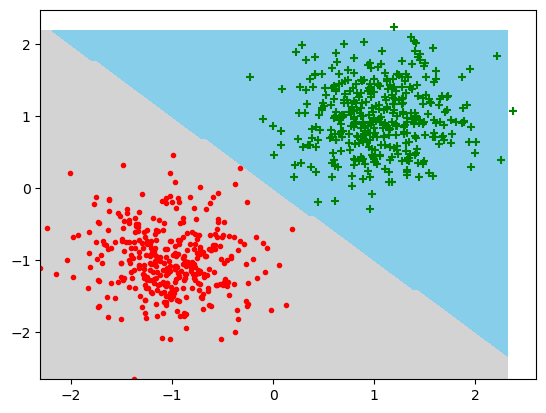

In [3]:
datax, datay = gen_arti(epsilon=0.3, data_type=0)
indices = np.arange(len(datax))
datax, testx, datay, testy = train_test_split(datax, datay)

model = Lineaire(max_iter=2000)
model.fit(datax, datay)
print("Score en train :", model.score(datax, datay))
print("Score en test :", model.score(testx, testy))

plot_frontiere(datax, lambda x: np.sign(x.dot(model.w)), step=100)
plot_data(datax, datay)


Mélange de gaussiennes, bruitées :


100%|██████████| 100/100 [00:00<00:00, 11113.09it/s]


Score en train : 0.916
Score en test : 0.896


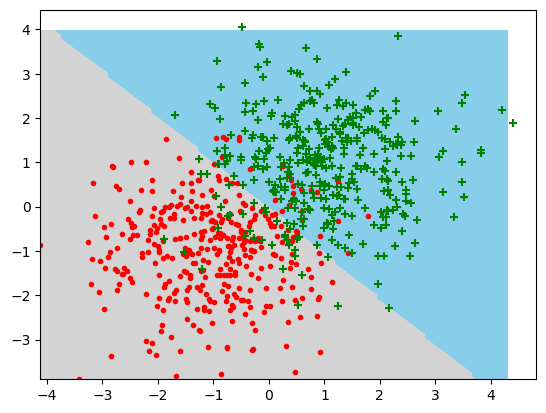

In [4]:
datax, datay = gen_arti(epsilon=1, data_type=0)
indices = np.arange(len(datax))
datax, testx, datay, testy = train_test_split(datax, datay)

model = Lineaire()
model.fit(datax, datay)
print("Score en train :", model.score(datax, datay))
print("Score en test :", model.score(testx, testy))

plot_frontiere(datax, lambda x: np.sign(x.dot(model.w)), step=100)
plot_data(datax, datay)


Marche très bien sur des données linéaires, même si très bruitées.


# Données USPS


In [5]:
alltrainx, alltrainy = load_usps("../data/USPS_train.txt")
alltestx, alltesty = load_usps("../data/USPS_test.txt")


def load_one_class(number):
    X_train, y_train = get_usps(number, alltrainx, alltrainy)
    X_test, y_test = get_usps(number, alltestx, alltesty)
    y_train = np.where(y_train == number, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == number, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test


def load_two_classes(neg, pos):
    X_train, y_train = get_usps([neg, pos], alltrainx, alltrainy)
    X_test, y_test = get_usps([neg, pos], alltestx, alltesty)
    y_train = np.where(y_train == neg, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == neg, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test


## 6 vs 9


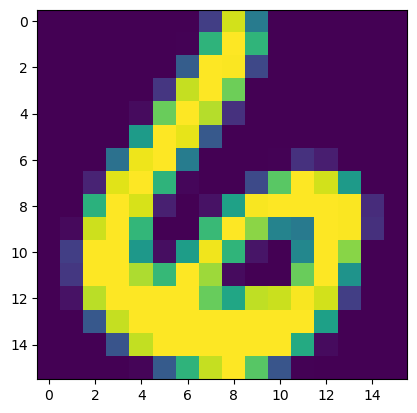

In [6]:
X_train, y_train, X_test, y_test = load_two_classes(6, 9)
show_usps(X_train[0])
plt.show()


100%|██████████| 1000/1000 [00:04<00:00, 241.49it/s]


Score en train : 0.9762996941896025
Score en test : 0.9510086455331412


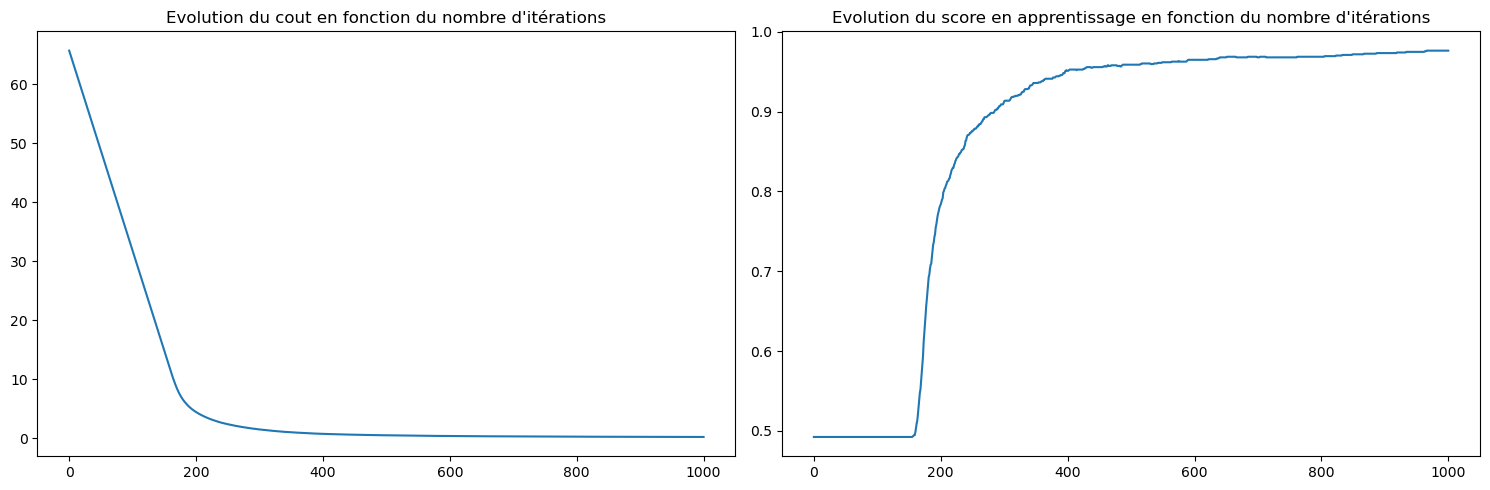

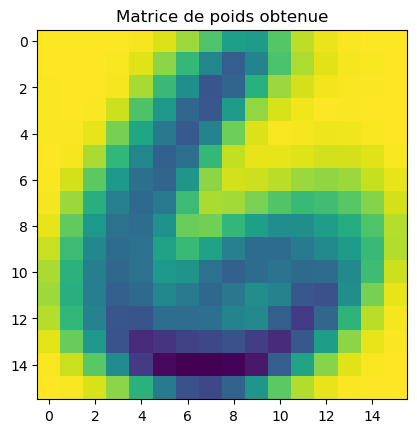

In [7]:
model = Lineaire(max_iter=1000)
w, weights, losses, scores = model.fit(X_train, y_train)

print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

show_usps(w)
plt.title("Matrice de poids obtenue")
plt.show()


### Ajout d'un biais linéaire


100%|██████████| 1000/1000 [00:04<00:00, 213.04it/s]


Score en train : 0.9762996941896025
Score en test : 0.9481268011527377


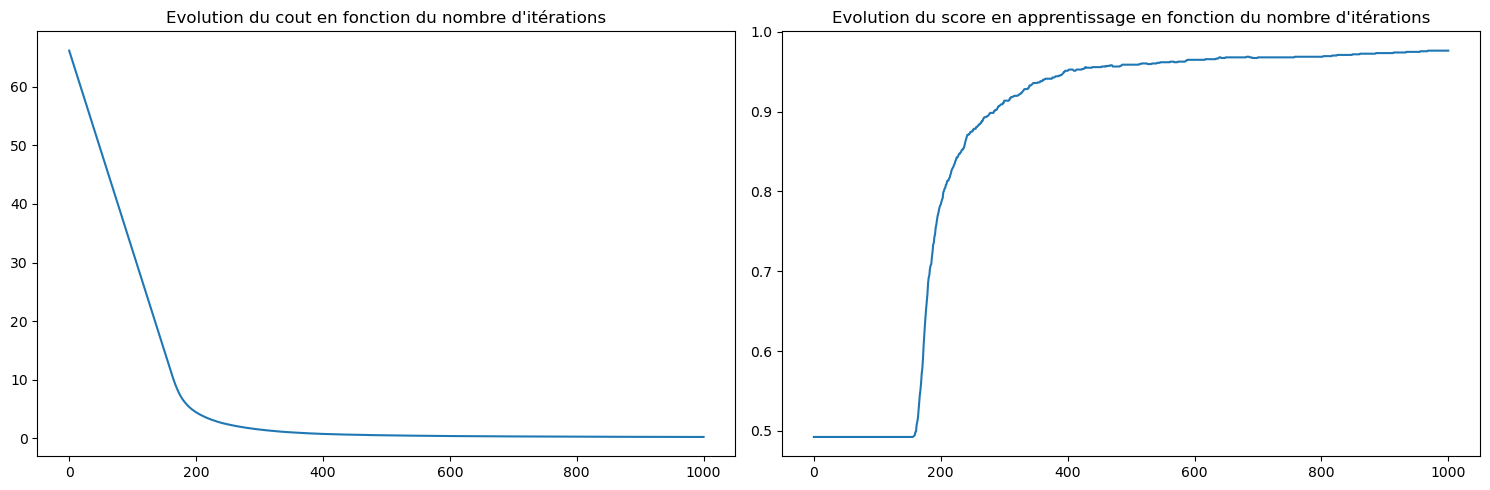

In [8]:
model = Lineaire(max_iter=1000, projection=proj_biais)
w, weights, losses, scores = model.fit(X_train, y_train)

print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)


## One-vs-all


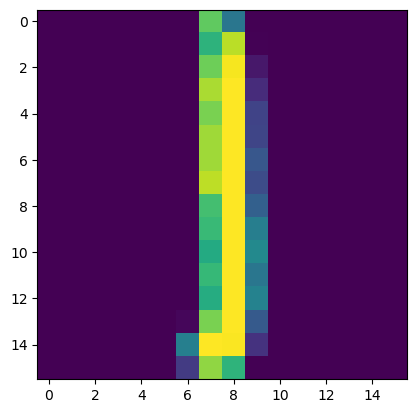

In [9]:
X_train, y_train, X_test, y_test = load_one_class(1)
show_usps(X_train[0])
plt.show()


100%|██████████| 100/100 [00:00<00:00, 400.00it/s]


Score en train : 0.8417910447761194
Score en test : 0.7916666666666666


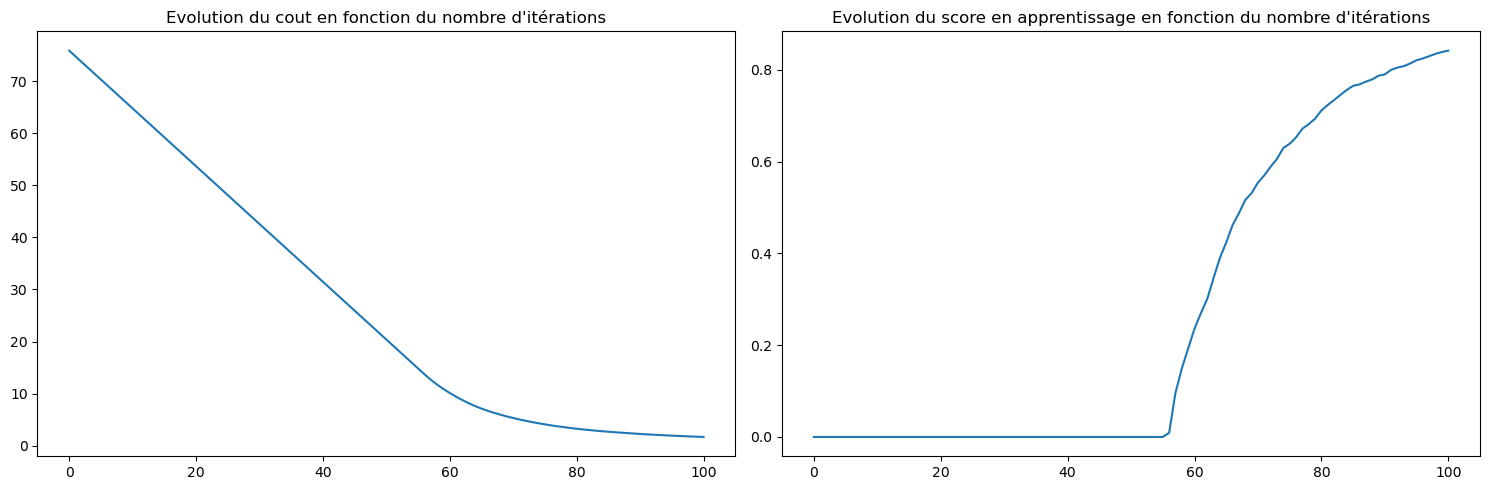

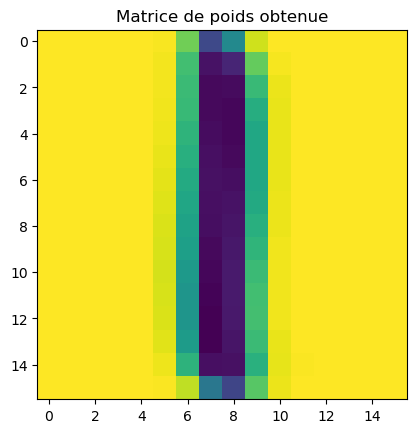

In [10]:
model = Lineaire()
w, weights, losses, scores = model.fit(X_train, y_train)

print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

show_usps(w)
plt.title("Matrice de poids obtenue")
plt.show()


### Ajout d'un biais linéaire


100%|██████████| 1000/1000 [00:03<00:00, 295.77it/s]


Score en train : 0.9950248756218906
Score en test : 0.9621212121212122


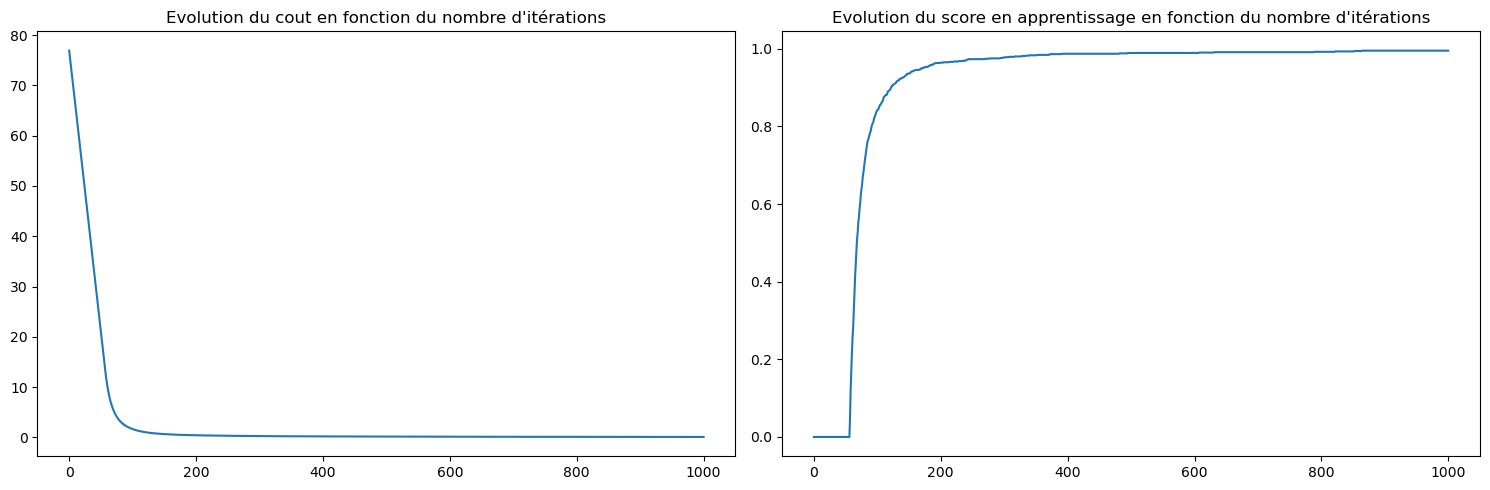

In [11]:
model = Lineaire(max_iter=1000, projection=proj_biais)
w, weights, losses, scores = model.fit(X_train, y_train)

print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)


Marche très bien également, notons que la façon d'initialiser nos poids a un impact sur le $w$ optimal.


# Données non linéairement séparables

(mélange de 4 gaussiennes)

Comme nous l'avons vu dans le TME précédemment, il est impossible de séparer de telles données. La solution est de projeter les données à l'aide d'une projection polynomiale, voire gaussienne.


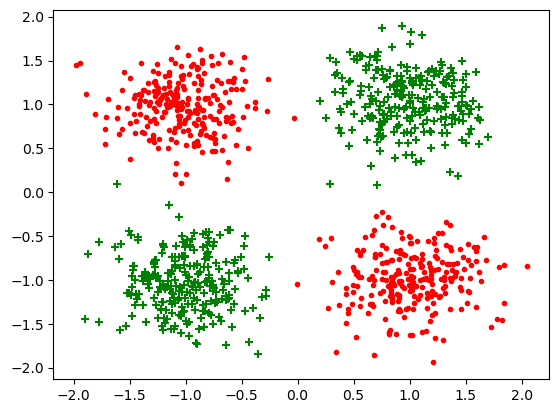

In [12]:
X, y = gen_arti(nbex=1000, data_type=1, epsilon=0.02)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)


100%|██████████| 200/200 [00:00<00:00, 5405.73it/s]


Score en train : 0.9813333333333333
Score en test : 0.988


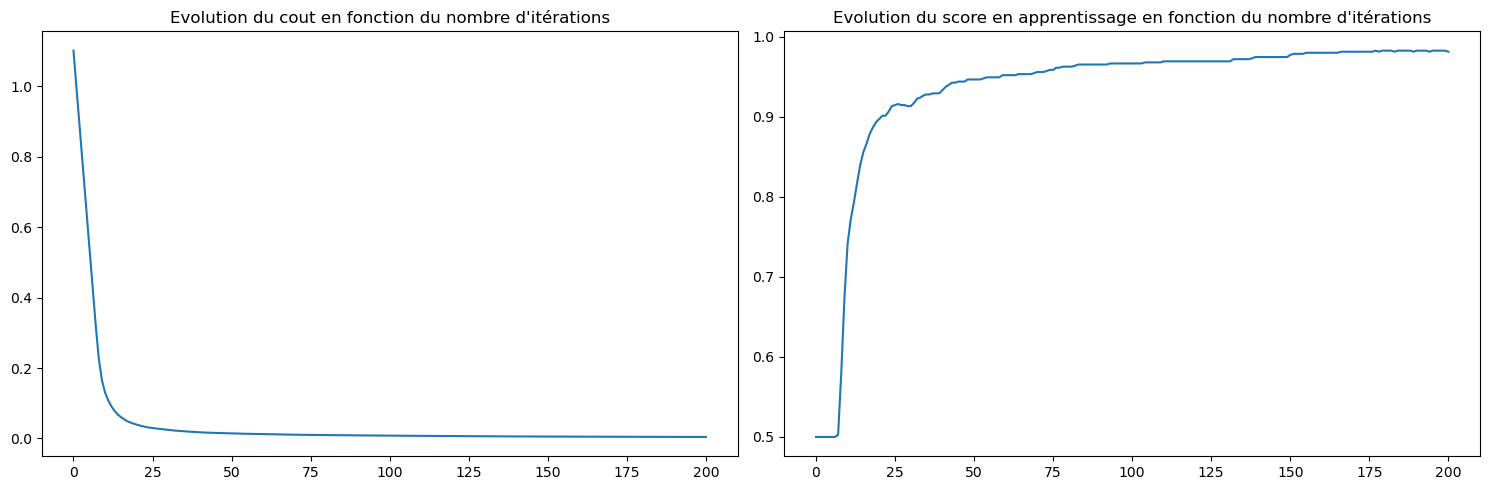

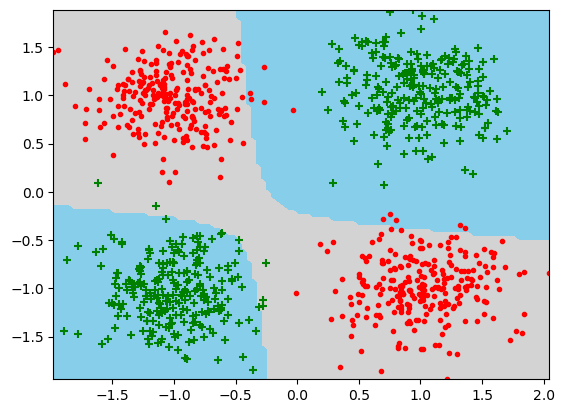

In [13]:
model = Lineaire(max_iter=200, eps=1e-1, projection=proj_poly)
w, weights, losses, scores = model.fit(X_train, y_train)
print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

plot_frontiere_perceptron(X, model, step=100)
plot_data(X, y)


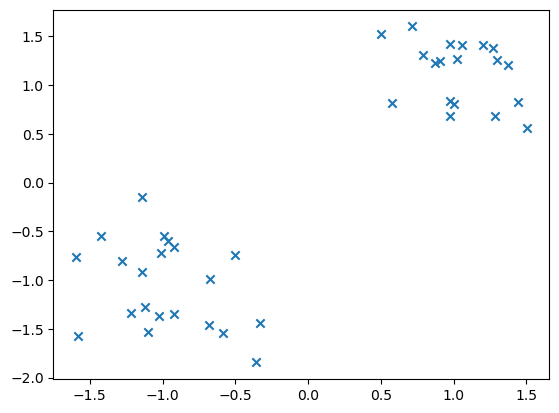

In [14]:
b = 40  # nombre de points de la base
pos = X_train[y_train[:, 0] == 1]
idx = np.random.choice(len(pos), size=b, replace=False)
B = pos[idx]
plot_data(B)


100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Score en train : 0.492
Score en test : 0.496


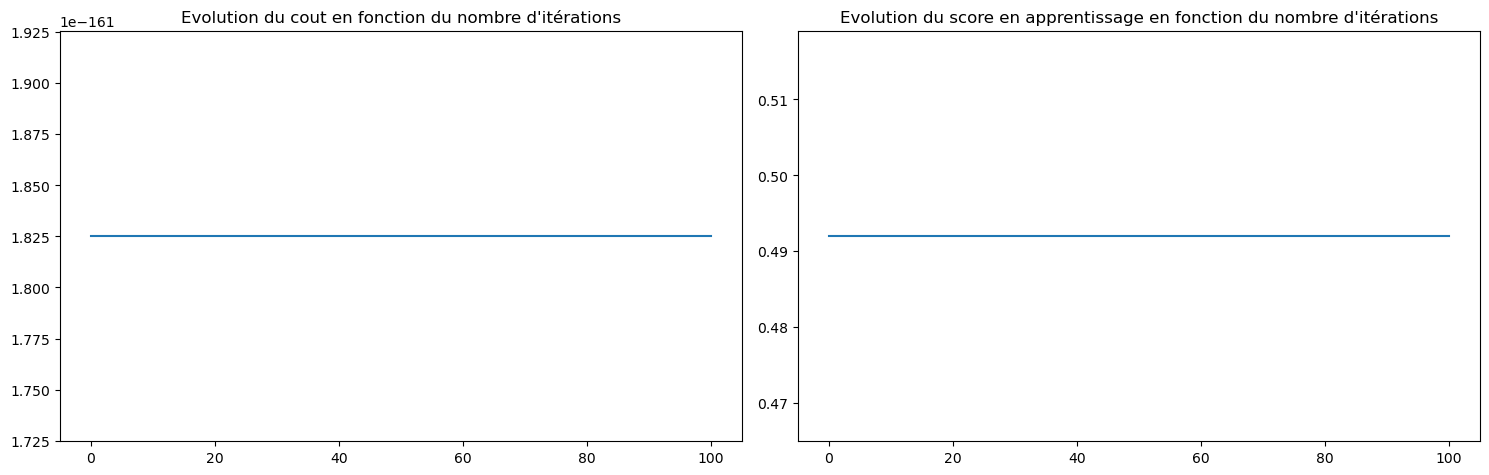

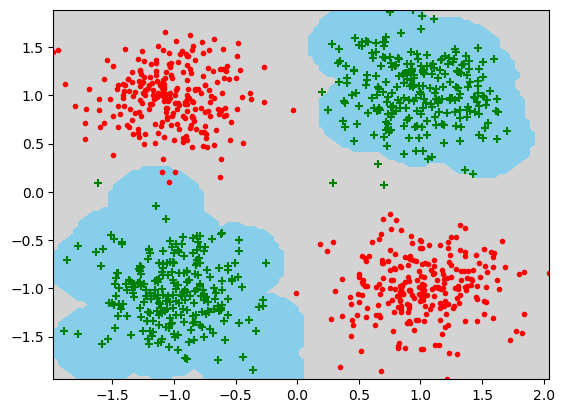

In [15]:
model = Lineaire(projection=proj_gauss, base=B, sigma=0.01)
w, weights, losses, scores = model.fit(X_train, y_train)
print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

plot_frontiere_perceptron(X, model, step=100)
plot_data(X, y)


Je ne sais pas pourquoi le score est de 50 %... c'est comme si je classifiais tout dans une classe... alors que la frontière est correcte..?


# Echequier


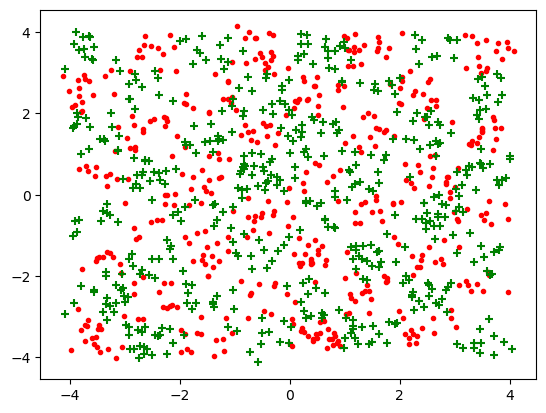

In [16]:
X, y = gen_arti(epsilon=0.1, data_type=2)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)


Enfin, ici, pour séparer nos données, il faut faire appel à une projection gaussienne.


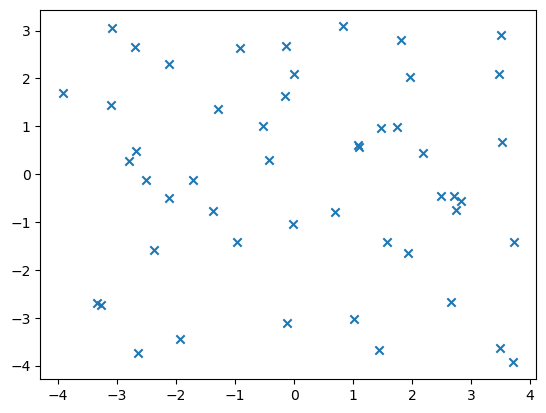

In [17]:
b = 50  # nombre de points de la base
pos = X_train[y_train[:, 0] == 1]
idx = np.random.choice(len(pos), size=b, replace=False)
B = pos[idx]
plot_data(B)


100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


Score en train : 0.26666666666666666
Score en test : 0.22


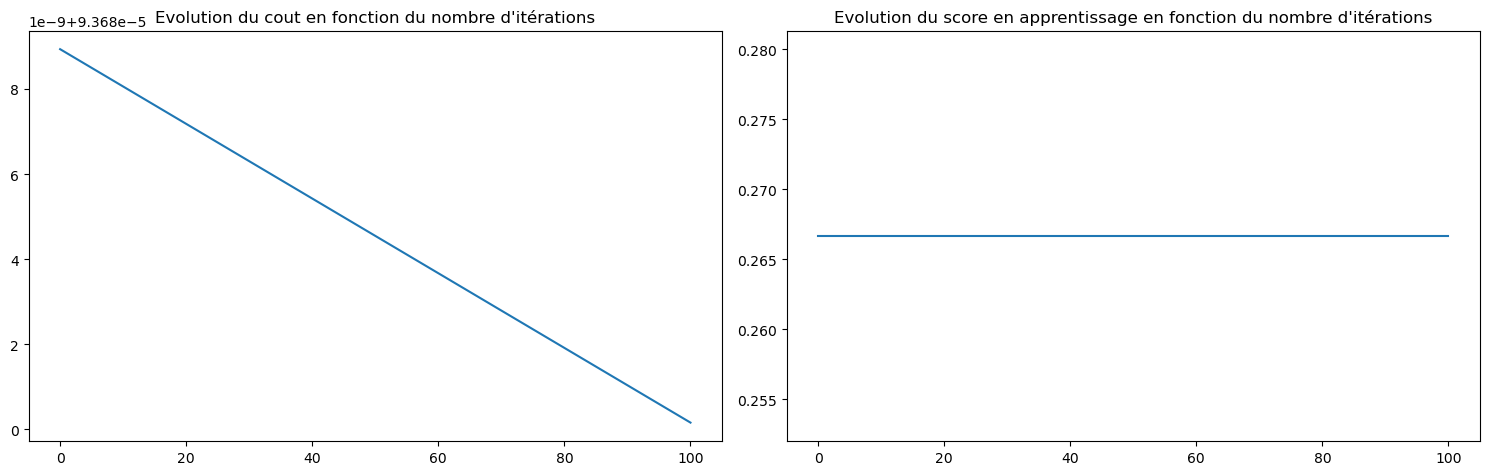

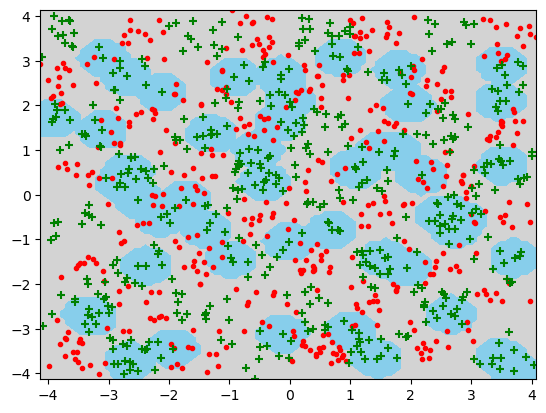

In [18]:
model = Lineaire(max_iter=100, projection=proj_gauss, base=B, sigma=0.01)
w, weights, losses, scores = model.fit(X_train, y_train)
print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

plot_frontiere_perceptron(X, model, step=100)
plot_data(X, y)


Je m'attendais à quelque chose de mieux, je ne crains m'être trompé quelque part : sûrement la façon dont je créé la base.
